<a href="https://colab.research.google.com/github/refido/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

**TUGAS PRAKTIKUM**

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


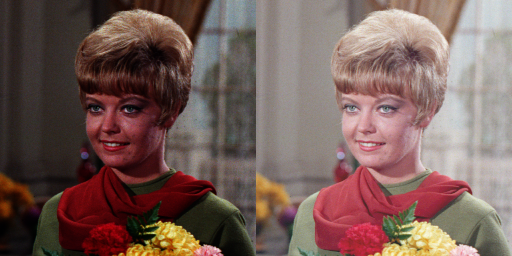

In [22]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_img = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for height in range(original.shape[0]):
  for width in range(original.shape[1]):
    for channels in range(original.shape[2]):
      gamma_img[height,width,channels] = np.clip(255 * (original[height,width,channels]/255)**(1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

2. **Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Buat
simulasi dengan menggunakan nilai kedalaman 1 s/d 7 - bit

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai bit depth: 1


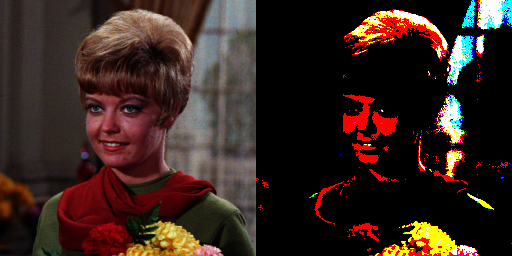

In [29]:
bit_depth_img = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  bit_depth = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit=2**bit_depth
level = 255/(bit-1)

for height in range(original.shape[0]):
  for width in range(original.shape[1]):
    for channels in range(original.shape[2]):
      bit_depth_img[height,width,channels] = np.clip(round(original[height,width,channels]/level)*level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_img))
cv2_imshow(final_frame)

3. **Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [ ]:
import glob
from math import lo10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/Images/noises/*.jpg')
n = cv.imread(img)
cv_img.append

noise_number = cv_img[4]

for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_number = cv.addWeighted(cv_img[i], alpha, noise_number, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed)** 2)
  if(mse == 0):

    return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return pnsr

compressed = noise_number
psnr = PSNR(original, compressed)
print('Jumlah Cintra Avarange = 5')
print('Nilai PSNR adalah', psnr, 'dB')

final_frame = cv.hconcat((original, noise_number))
cv2_imshow(final_frame)